<h2 style='text-align:center;font-size:80px;background-color:indigo;border:80px;color:white'>   Loan Application Status Project . <h2>

# Problem Statement

### This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc

# Independent Variables

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

# Dependent Variable

- Loan Status

### we have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset

## this problem statement tell us that the target has two classes Yes and No so it is a "Classification problem".

# --------------------------------------------------------------------------------

In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file from dataset
df = pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Dataset here have 614 rows and 13 columns

In [3]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
df.tail(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
101,LP001349,Male,No,0,Graduate,No,4843,3806.0,151.0,360.0,1.0,Semiurban,Y
64,LP001222,Female,No,0,Graduate,No,4166,0.0,116.0,360.0,0.0,Semiurban,N
247,LP001819,Male,Yes,1,Not Graduate,No,6608,0.0,137.0,180.0,1.0,Urban,Y


#### There a re Nan values in dataset which needs to be filled

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### The dataset contains both numerical and categorical columns. This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. Here "Loan_Status" is our target variable which has two classes "Yes" and "No". So it will be termed as Classification problem.

<h2 style='text-align:center;font-size:50px;background-color:white;border:50px;color:blue'> EDA <h2>

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Max of the columns are object data types which need to be encoded.. will do encoding later

In [8]:
# dataset dimensions
df.shape

(614, 13)

#### The dataset contains 614 rows and 13 columns which includes both categorical and numerical data. Also out of 13 columns 12 are features and remaining one is our target variable.

In [9]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Here we get the Information regarding Column,Non-Null Count(columns having NaN Values) ,Dtypes and Memory usage of the dataset .. We can Notice the Null values present the dataset bcz of different Null Value count

In [10]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)


['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [11]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)


['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [12]:
# Checking number of unique values in each column
df.nunique()


Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

#### Unique value present in each column in datset

In [13]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('------------------------------------')


LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
------------------------------------
Male      489
Female    112
Name: Gender, dtype: int64
------------------------------------
Yes    398
No     213
Name: Married, dtype: int64
------------------------------------
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
------------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
------------------------------------
No     500
Yes     82
Name: Self_Employed, dtype: int64
------------------------------------
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
------------------------------------
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2

#### These are the list of value counts present in each columns.

### The column Loan_ID is the unique ID given to the applicants also it has no significane in the prediction so let's drop this column.

In [14]:
# Removing unwanted column
df.drop("Loan_ID",axis=1,inplace=True)


# Now lets check null values

In [15]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### We can see that NaN value are present in the dataset .. Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History have NaN values

<AxesSubplot:>

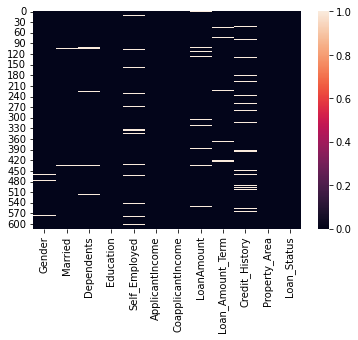

In [16]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())


#### white lines in heatmap represents null values

# Now lets treat null value

In [17]:
#Fill Gender NaN Value
print (df["Gender"].mode())
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

# Fill Married NaN Value
print (df["Married"].mode())
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

# Fill Dependent NaN Value

print (df["Dependents"].mode())
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

# Fill Self_Employed NaN Value

print (df["Self_Employed"].mode())
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])


# Fill LoanAmount NaN Value
print (df["LoanAmount"].median())
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

# Fill Loan_Amount_Term NaN Value
print (df["Loan_Amount_Term"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())# Fill LoanAmount NaN Value


print (df["Credit_History"].median())
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].median())



0    Male
Name: Gender, dtype: object
0    Yes
Name: Married, dtype: object
0    0
Name: Dependents, dtype: object
0    No
Name: Self_Employed, dtype: object
128.0
360.0
1.0


#### Filled nan values

In [18]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### No nan value is present in dataset now

In [19]:
# Checking the uniqueness of primary_fuel
df["Loan_Status"].unique()


array(['Y', 'N'], dtype=object)

#### These are the unique values present in the target column.

In [20]:
# Checking the list of counts in target columns
df['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

#### We have two counts in Loan_Status namely "Y" and "N". Here "Y" stands for "Yes" that is the loan of the applicant is approved and "N" stands for "No" that is the loan of the applicant is not approved. Here loan approved has high counts than loan not approved... and target value is imbalance we will balance it later

In [21]:
# Checking wheather the dataset contains any space
df.loc[df['Loan_Status']==" "]


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


#### There is no space present in dataset

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:blue'> A. Univariate Analysis <h2>

In [22]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Y    422
N    192
Name: Loan_Status, dtype: int64


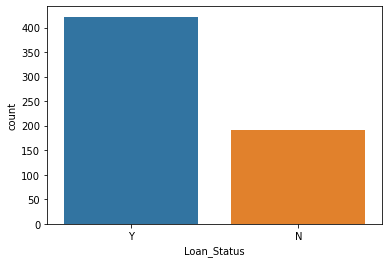

In [23]:
# Visualizing the loan approval status
print(df["Loan_Status"].value_counts())
sns.countplot(df["Loan_Status"])
plt.show()


#### Here it is clear that max of people got their loan approved where as only 192 people havent got their loan approved due to any reason.. 

Male      502
Female    112
Name: Gender, dtype: int64


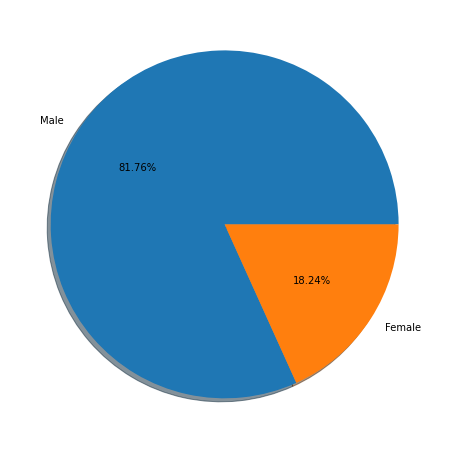

In [24]:
#Visualize the count of applicants Gender
print(df["Gender"].value_counts())
labels='Male','Female'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Gender'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()


#### There are more number of Male applicants applying for loan than Female applicants. There are about 81% of the Male candidates and only 18% of Female candidates are applying for the loan.

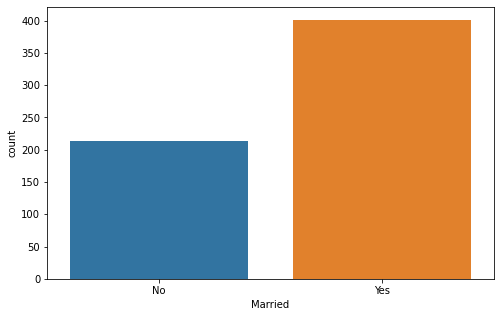

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(df['Married'])
plt.show()

#### There are more number of married people who are taking loan in comparision with unmarried

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


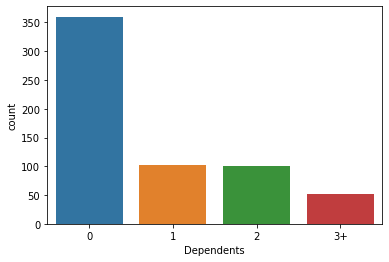

In [26]:
# Visualizing the count of Dependents 
print(df["Dependents"].value_counts())
sns.countplot(df["Dependents"])
plt.show()


#### The applicants who have 0 dependents have high counts and the applicants having more than 3 dependents counts are very less.

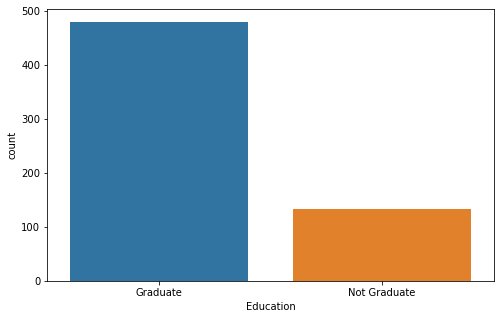

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(df['Education'])
plt.show()

#### Graduate people are more who are appliying for loan in comparision to not graduate

No     532
Yes     82
Name: Self_Employed, dtype: int64


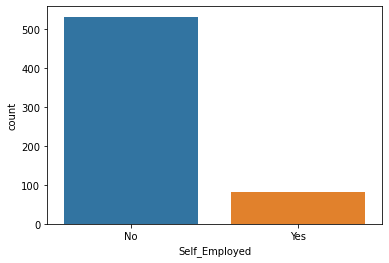

In [28]:
# Visualizing the count of Self_Employed applicants
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"])
plt.show()


#### Most of the applicants or not self employed that means they might working in the public sectors and only 82 applicants are self employed and running their own bussiness.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


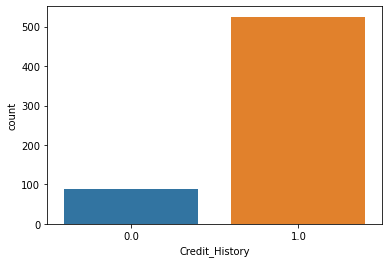

In [29]:
# Visualizing the count of Credit_History of the applicants
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"])
plt.show()


#### Most of the applicants who have credit history 1 are high in numbers.

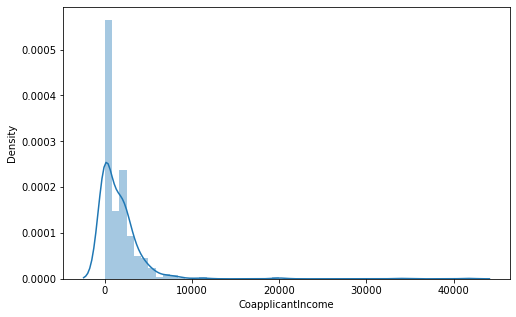

In [31]:

plt.figure(figsize=(8,5))
sns.distplot(df['CoapplicantIncome'])
plt.show()

In [32]:
df['CoapplicantIncome'].mean()

1621.245798027101

#### Co-applicant income seems to be on Zero by graph,the average is just 1621

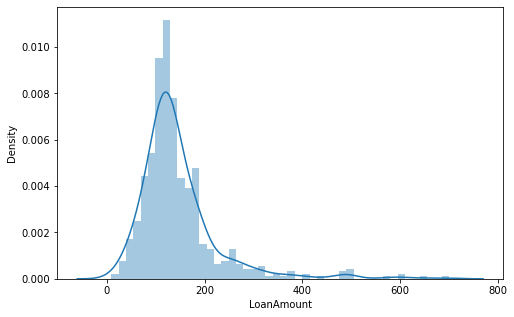

In [33]:
plt.figure(figsize=(8,5))
sns.distplot(df['LoanAmount'])
plt.show()

In [34]:
df['LoanAmount'].median()

128.0

#### Average Loan amount is 128

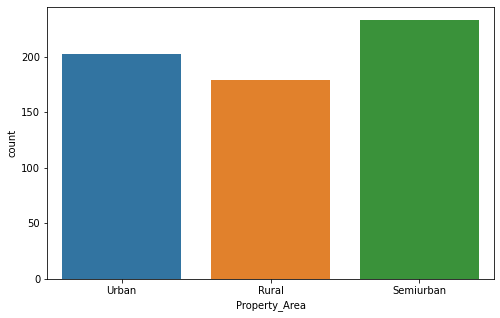

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(df['Property_Area'])
plt.show()

#### We can see that maximum count for loan is from Semiurban area than followed by urban and least is Rural

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:blue'> B. Bivariate Analysis <h2>

In [36]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

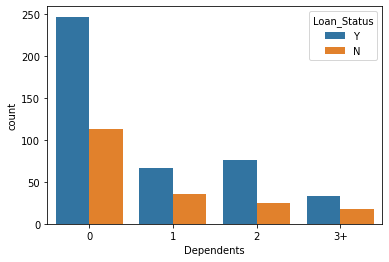

In [37]:
#Visualizing count of Dependents of the applicants on the basis of loan status
sns.countplot(df["Dependents"],hue=df["Loan_Status"])
plt.show()

#### The count of 0 dependents is high which means most of the applicants have no dependents. Having dependents means having commitments.



#### The 3+ dependents means more than 3 applicants have dependents. The applicants who have dependents 0 are more likely to get their loan approved.

Male      502
Female    112
Name: Gender, dtype: int64


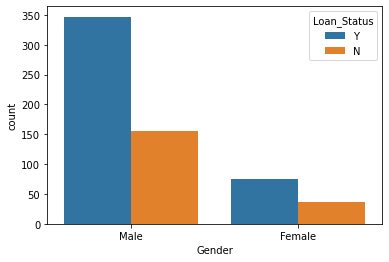

In [38]:
print(df["Gender"].value_counts())
sns.countplot(df["Gender"],hue=df["Loan_Status"])
plt.show()


#### We can see that in case of Gender Males are getting more loans as Compared to Females, this may be because male applicant are more in number

Yes    401
No     213
Name: Married, dtype: int64


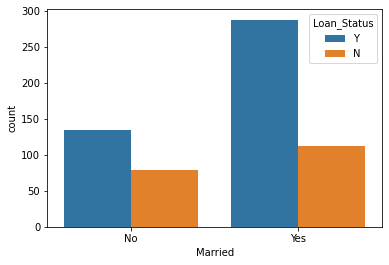

In [39]:
print(df["Married"].value_counts())
sns.countplot(df["Married"],hue=df["Loan_Status"])
plt.show()

#### We can see that maximum loan is Granted and apllied by the People who are Married as Compared to the People who are single

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


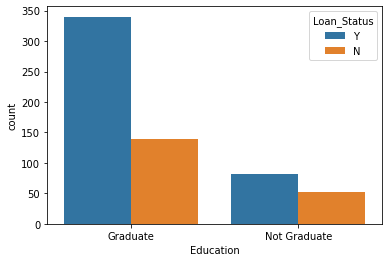

In [40]:
print(df["Education"].value_counts())
sns.countplot(df["Education"],hue=df["Loan_Status"])
plt.show()

#### We can see that the people who are Graduate are been granted Loans and compared to Not graduates .. this May because of his qualification or Education that makes my capable for the repayement of the loan

No     532
Yes     82
Name: Self_Employed, dtype: int64


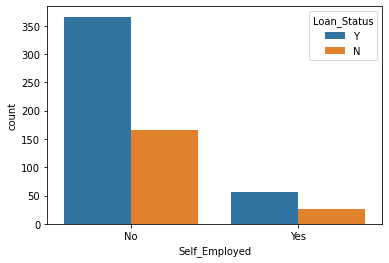

In [41]:
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"],hue=df["Loan_Status"])
plt.show()

#### There is a vast difference in count of No and Yes inside this columns .. We can see that the people who are not self employed has applied in large number and have been granted loan and people who are self employed applied for loans are less

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


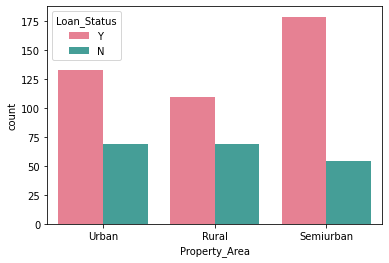

In [42]:
#Visualizing Property_Area of the applicants
print(df["Property_Area"].value_counts())
sns.countplot(df["Property_Area"],hue=df["Loan_Status"],palette="husl")
plt.show()


#### Most of the applicants from the Semiurban are applying for loan followed by Urban area. Also they have more chance of getting their loan approval.



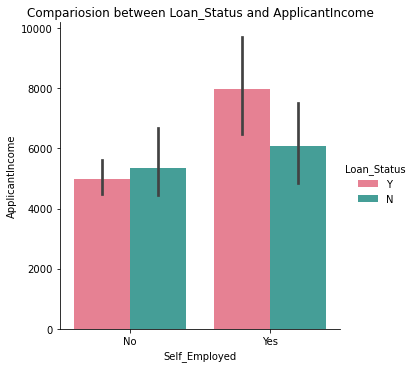

In [44]:
# Cheking relation between Self_Employed and ApplicantIncome
sns.catplot(x='Self_Employed',y="ApplicantIncome",data=df,kind="bar",hue='Loan_Status',palette='husl')
plt.title("Compariosion between Loan_Status and ApplicantIncome")
plt.show()


#### The applicants whose loan got approved have average income and have their own bussiness means they are self employed.

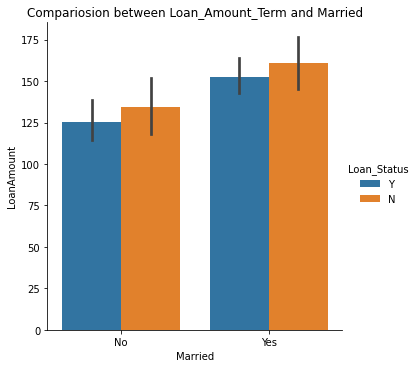

In [45]:
# Checking relation between LoanAmount and Married on the basis of target
sns.catplot(x="Married",y='LoanAmount',data=df,kind="bar",hue="Loan_Status")
plt.title("Compariosion between Loan_Amount_Term and Married")
plt.show()


#### The applicants who got married and have average loan amount have more tendency to getting loan.

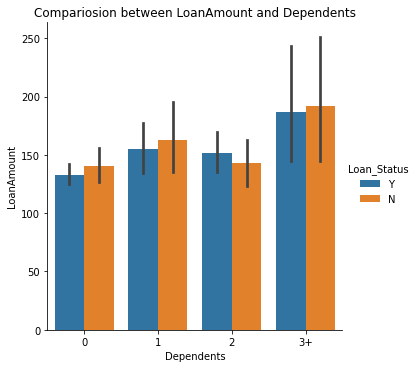

In [46]:
# Checking relation between Loan_Amount and Dependents on the basis of target
sns.catplot(x='Dependents',y="LoanAmount",data=df,kind="bar",hue="Loan_Status")
plt.title("Compariosion between LoanAmount and Dependents")
plt.show()

#### The applicants who have more than 3 dependents with average loan amount have got their loan approved.

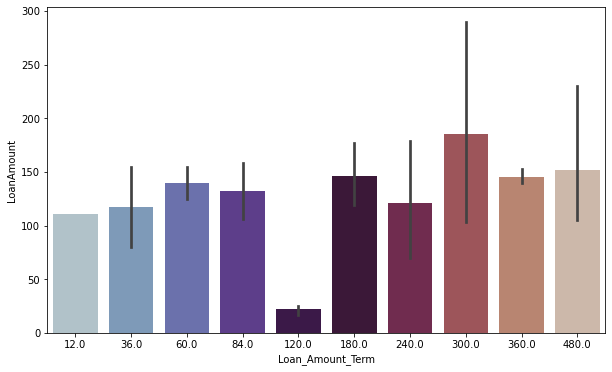

In [48]:
plt.figure(figsize = (10,6))
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df,palette='twilight')
plt.show()


#### We can see that as higher the loan ,the repayment period as also increase ..

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:blue'> C. Multi-variate Analysis <h2>

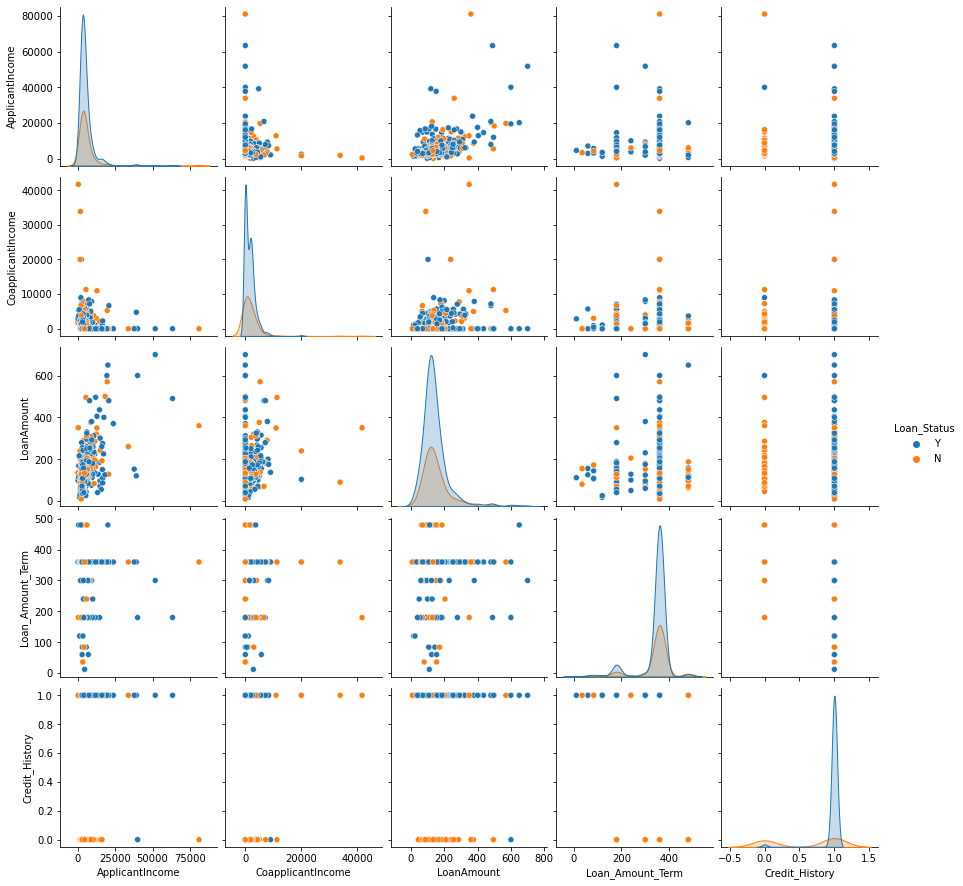

In [49]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Loan_Status")


#### This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Loan_Status". Here we can observe the relation between the features and label.

#### We can observe the linear relationship between ApplicantIncome and LoanAmount, CoapplicantIncome and LoanAmount, ApplicantIncome and TotalIncome.

#### We can also observe the correlation in some columns also there are outliers present in some of the columns.

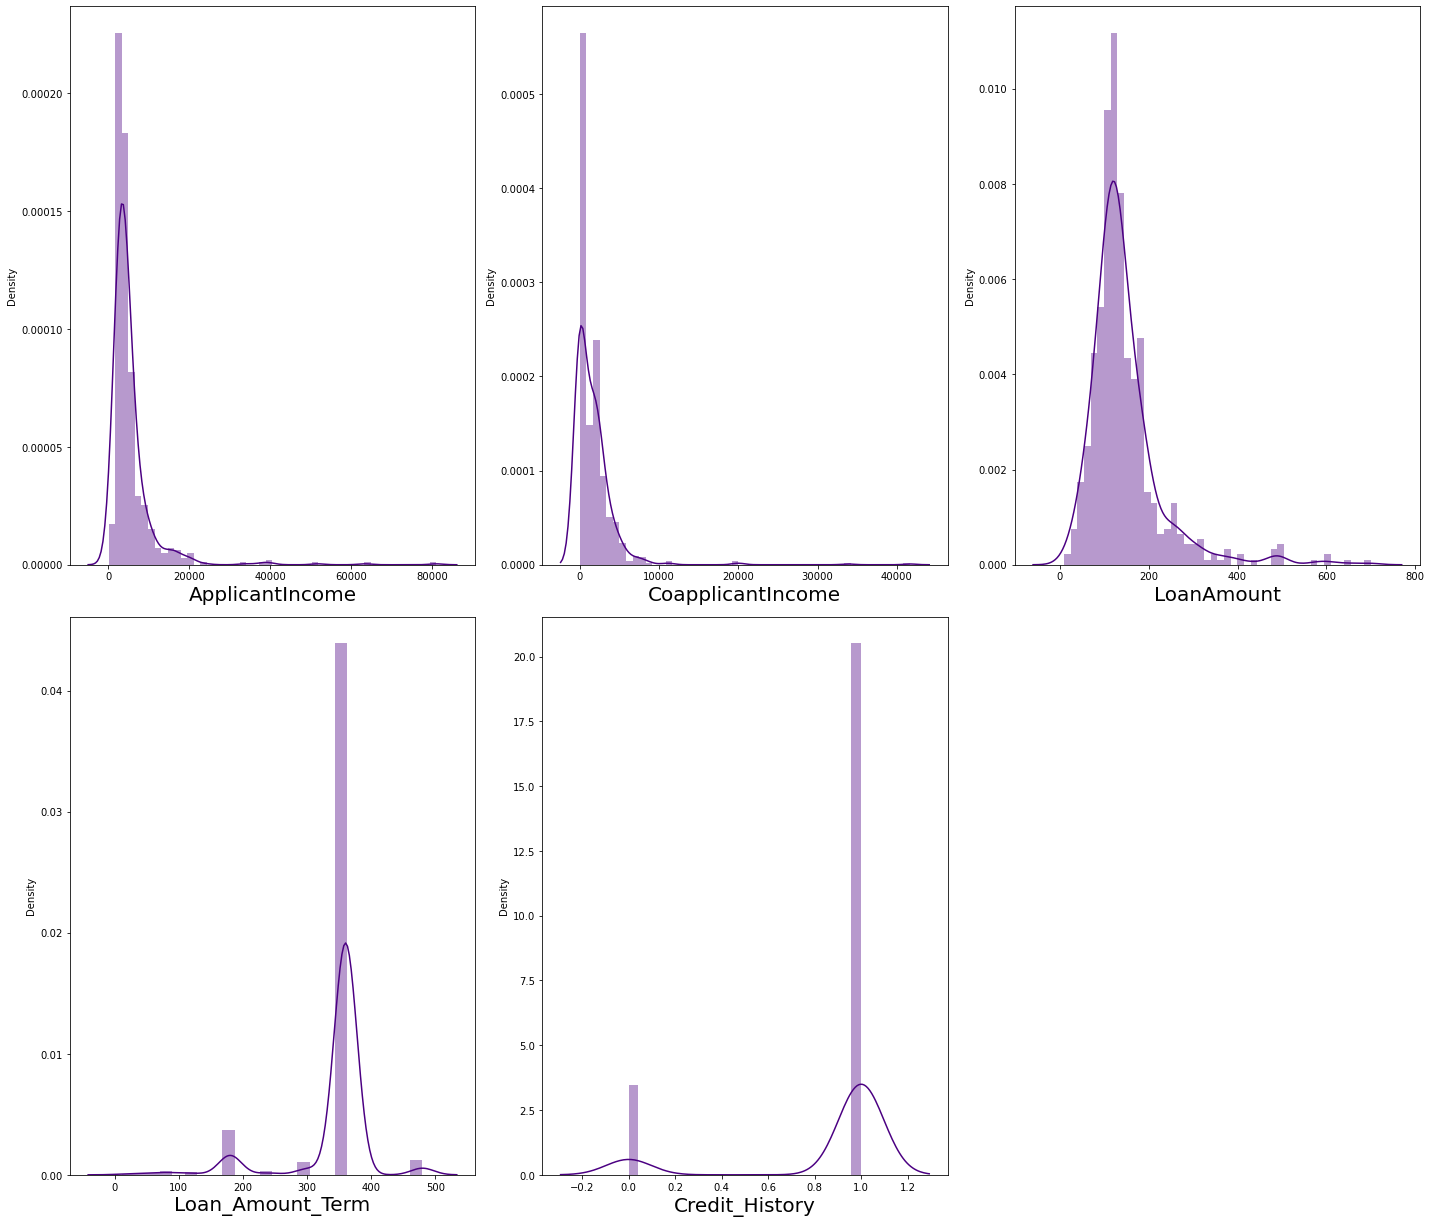

In [50]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="indigo")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### from above plot what i observe:
- The data is not normally distributed in any of the columns.

- The mean value is greater than the median in ApplicantIncome, CoapplicantIncome, LoanAmount and TotalIncome which means they are skewed to right.

- The median is greater than the mean in Loan_Amount_Term and Credit_History columns which means they are skewed to left. We will remove these skewness using appripriate methods in the later part.

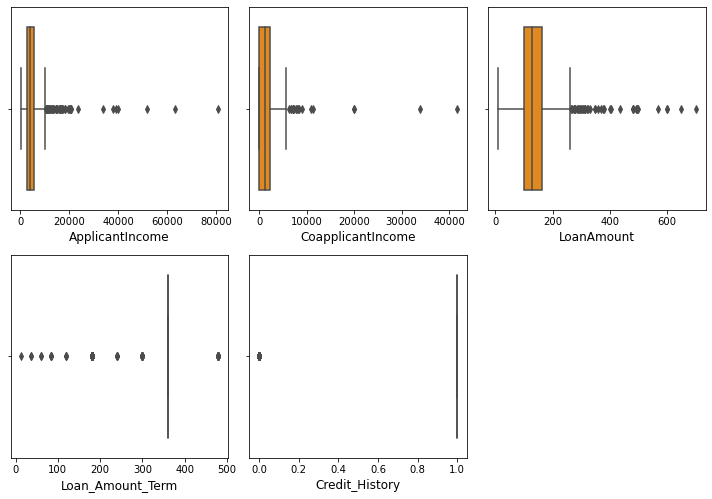

In [51]:
# Identifying the outliers present in numerical columns using boxplo

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()


#### Here we can see all numerical columns have outliers

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:blue'> CORRELATION <h2>

# Lets Convert all catagorical columns to into int format By Encoding

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
#Lets convert all catagorical columns to Int format

le = LabelEncoder()
Input = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

for i in Input:
    df[i] = le.fit_transform(df[i])

In [55]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


#### Encoded all categorical column t numerical column

In [56]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


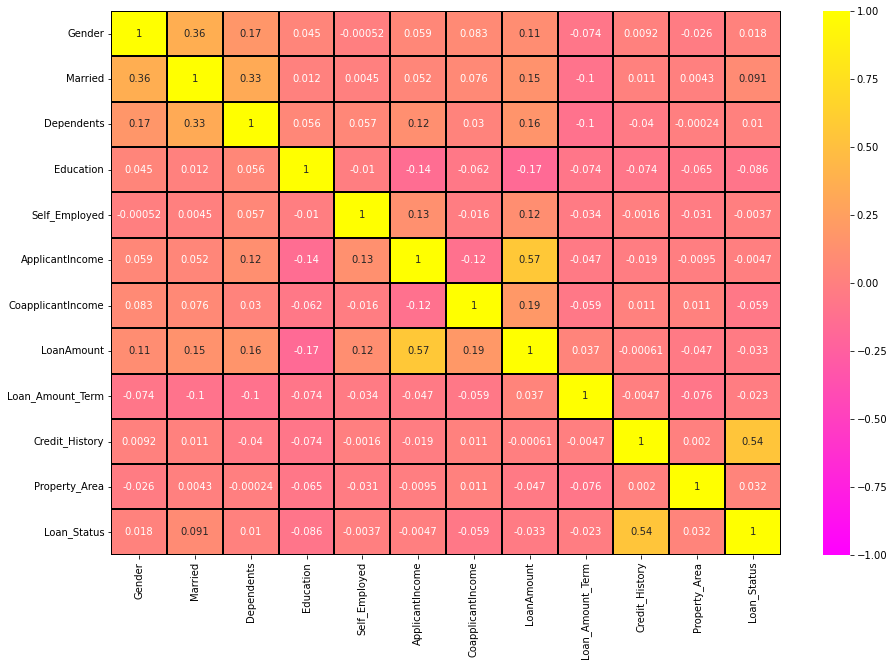

In [58]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':10},cmap="spring")
plt.yticks(rotation=0);

#### This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation..

#### This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

- This heat mapcontains both positive and negative correlation.

- The target column Loan_Status is highly positively correlated with the feature Credit_History.

- The other features have very less correlation with the target column.

- Also we can notice there is no multicollinearity issue in the features. Features have moderate level of correlation with each other.

- ApplicantIncome and Gender is very less correlated with the target.

- Dark shades are highly correlated and light shades are very less correlated.

In [60]:
df.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.033214
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

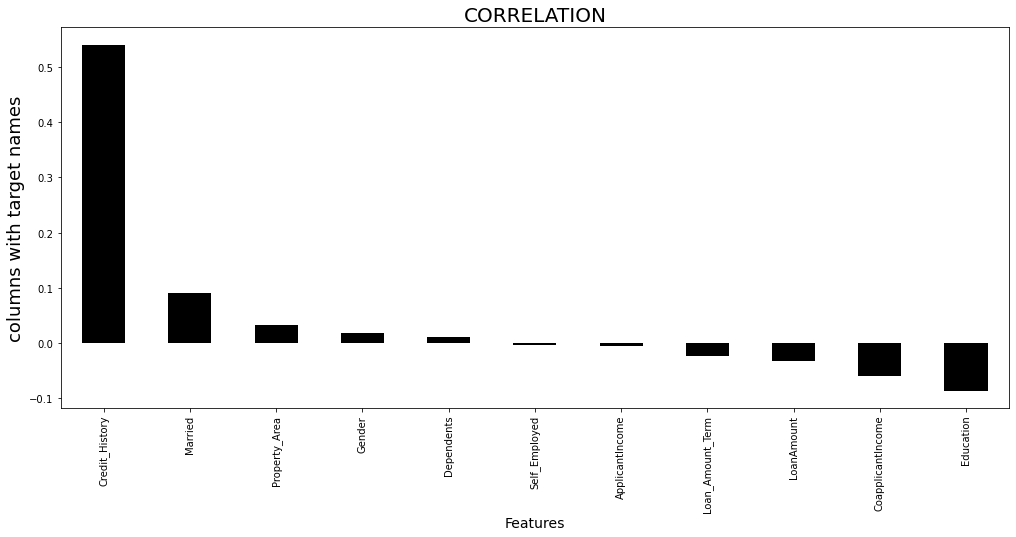

In [64]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(17,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='black')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

#### Least correlated feature with target is self_employed and Applicantincome.. we are not dropping this as we have less columns and i dont want to loose any info

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:blue'> DESCRIPTIVE STATISTICS <h2>

In [65]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


#### This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

#### From the above description we can observe the following things:

- The counts of all the columns are same which means there are no null values present in the dataset.
- The mean value is greater than the median(50%) in ApplicantIncome, CoapplicantIncome, LoanAmount which means they are skewed to right.
- The median is greater than the mean in Loan_Amount_Term and Credit_History which means they are skewed to left.
- There is a huge difference between mean and the standard deviation.
- In summarizing the data we can infer that there is a huge difference in max and 75% percentile means there are huge outliers present in the dataset. We will remove htese outliers using Zscore or IQR method in later part.

<AxesSubplot:>

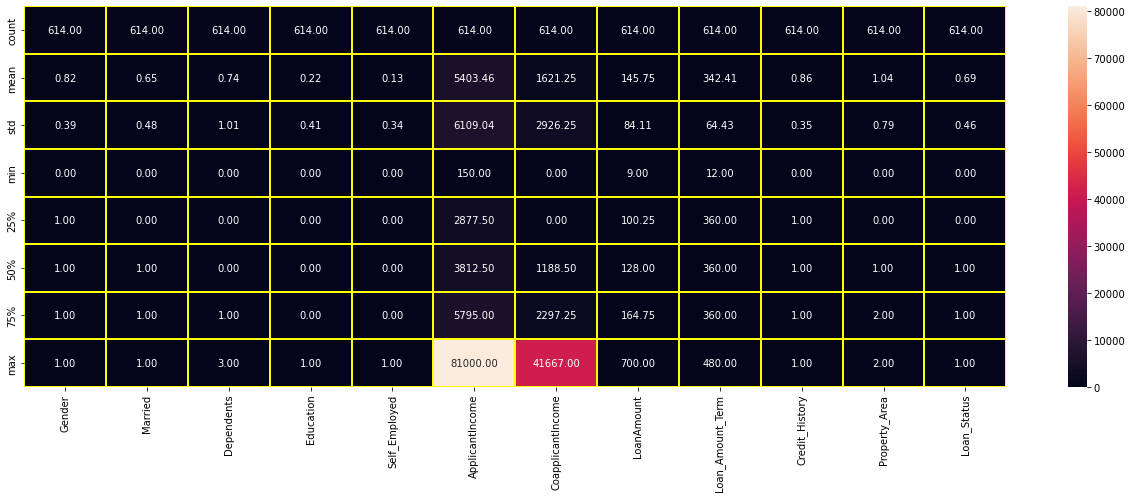

In [66]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,linecolor="yellow",fmt="0.2f")

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:blue'> Now lets Check  And Remove Outliers in the dataset <h2>

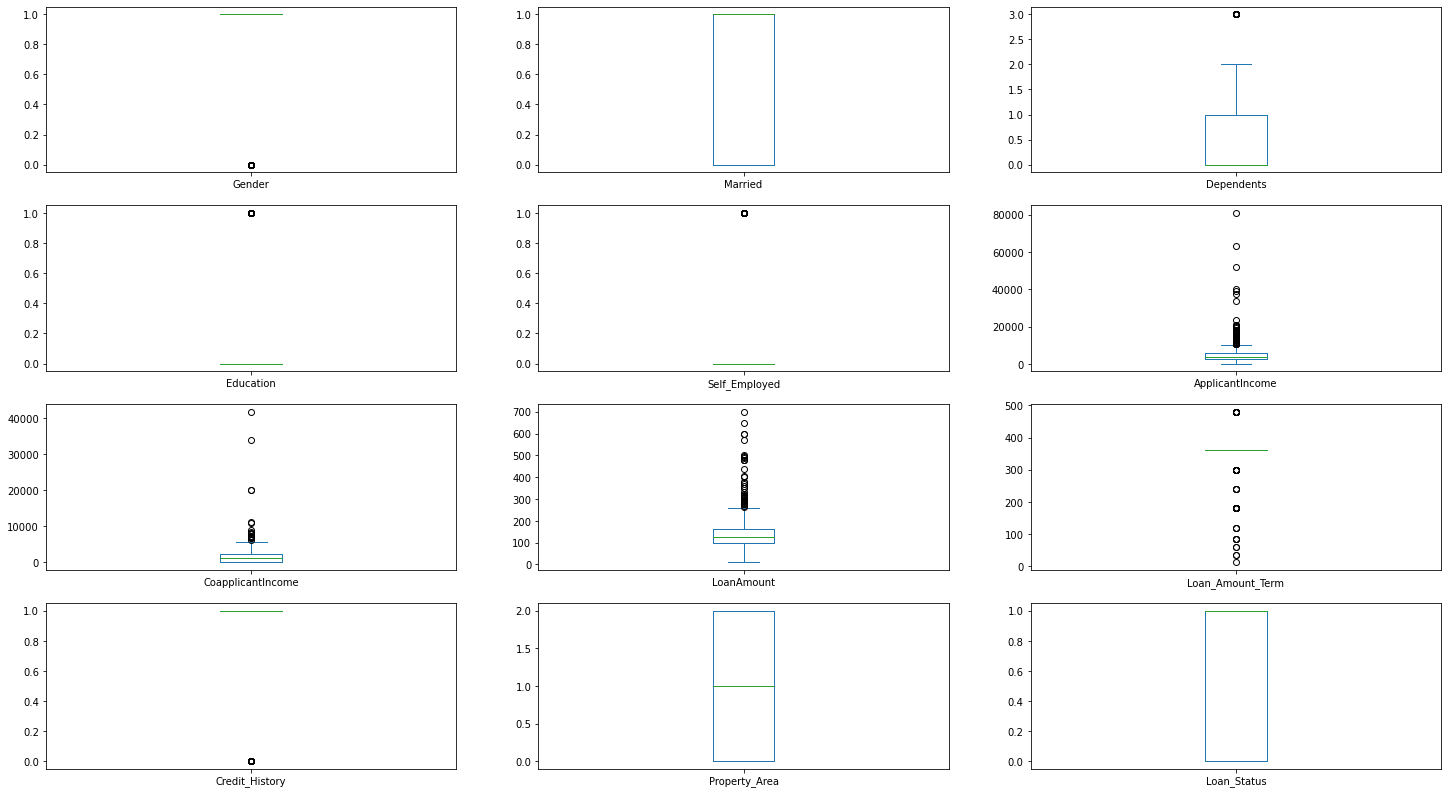

In [67]:
df.plot(kind='box',subplots=True,layout=(7,3),figsize=(25,25))
plt.show()

# ZScore Method

In [68]:
# Features containing outliers
features = df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,0.554487,0.211241,0.273231,0.411733
1,0.134412,0.038732,0.211241,0.273231,0.411733
2,0.393747,0.554487,0.948996,0.273231,0.411733
3,0.462062,0.251980,0.306435,0.273231,0.411733
4,0.097728,0.554487,0.056551,0.273231,0.411733
...,...,...,...,...,...
609,0.410130,0.554487,0.889500,0.273231,0.411733
610,0.212557,0.554487,1.258378,2.522836,0.411733
611,0.437174,0.472404,1.276168,0.273231,0.411733
612,0.357064,0.554487,0.490816,0.273231,0.411733


In [69]:
# Creating new dataframe
df_new = df[(z<3).all(axis=1)] 
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [70]:
df_new.shape

(577, 12)

In [71]:
df.shape

(614, 12)

In [72]:
# Percentage of data loss

DataLoss=((614-577)/614)*100
DataLoss

6.026058631921824

#### 6% of data loss in zscore method

# IQR Method

In [73]:
#1st quantile
Q1=df.quantile(0.25)

# 3rd quantile
Q3=df.quantile(0.75)

#IQR
IQR=Q3 - Q1
qq=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [74]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",qq.shape)
print("\nTotal Dropped rows:",df.shape[0]-qq.shape[0])

Old DataFrame data in Rows and Column: (614, 12)

New DataFrame data in Rows and Column: (207, 12)

Total Dropped rows: 407


In [75]:
#Percentage Data Loss using IQR
data_loss1 = (614-207)/614*100
data_loss1

66.28664495114006

#### 66% of data loss in iqr method

### we are going for ZScore Method

<h2 style='text-align:center;font-size:50px;background-color:white;border:40px;color:blue'> *Now Lets Remove Skewness Now* <h2>


In [78]:
L1=['ApplicantIncome','CoapplicantIncome','LoanAmount']

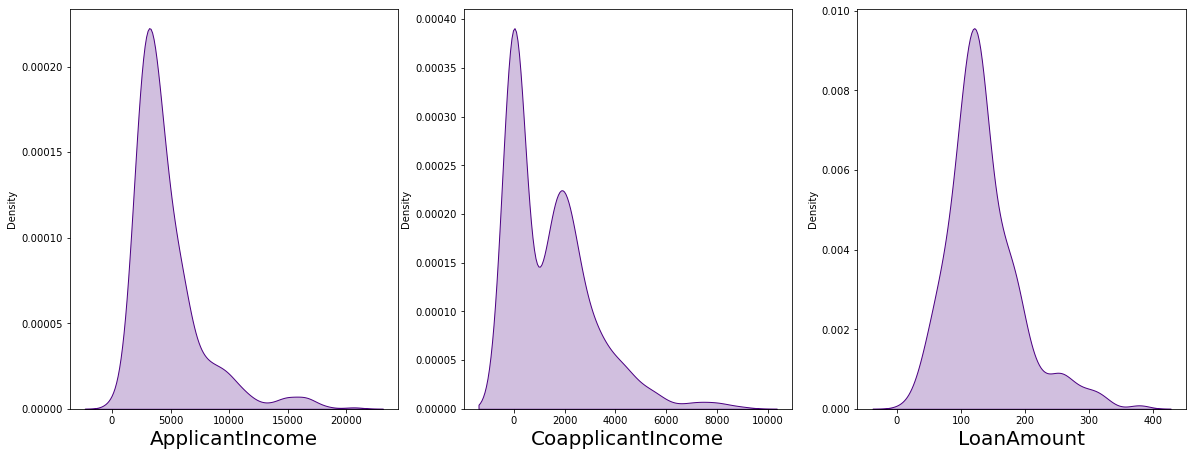

In [79]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new[L1]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [80]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [81]:
# Lets remove the skewness from given columns by Power Transform Method

from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

In [82]:
#Removing skewness using yeo-johnson
df_new[['ApplicantIncome','CoapplicantIncome','LoanAmount']] = PT.fit_transform(df_new[['ApplicantIncome','CoapplicantIncome','LoanAmount']].values)

In [83]:
#Checking skewness after removing skewness by power transform
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

#### We can see that all the Numerical column is Normalized Now

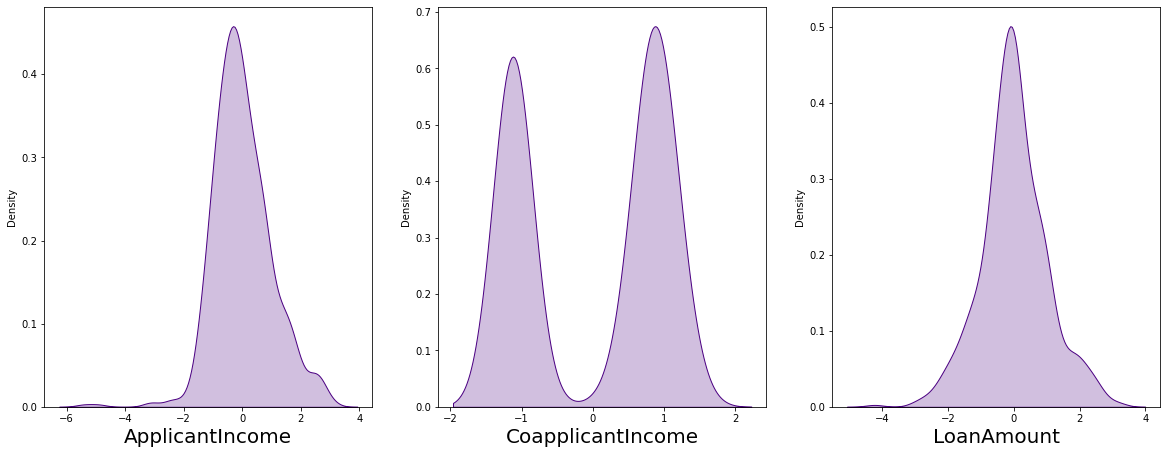

In [84]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new[L1]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### from above we can observe that skweness has been removed 

<h2 style='text-align:center;font-size:30px;background-color:pink;border:30px;color:indigo'> Now Lets Split the dataset into dependent and independent variable <h2>

In [86]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1


In [87]:
x=df_new.loc [:,df_new.columns != 'Loan_Status']
# Independent Variable

In [88]:
y=df_new.loc[:,'Loan_Status']
#Dependent Variable

In [89]:
x.shape

(577, 11)

In [90]:
y.shape

(577,)

## Balancing the dataset over here,otherwise it will be a baised dataset`


In [91]:
from imblearn.over_sampling import SMOTE

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

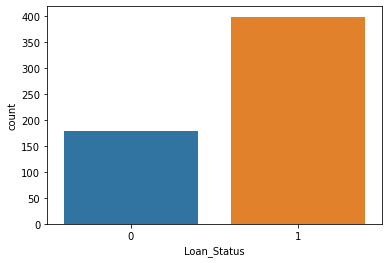

In [92]:
sns.countplot(y)

In [93]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [94]:
x.shape

(796, 11)

In [95]:
y.shape

(796,)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

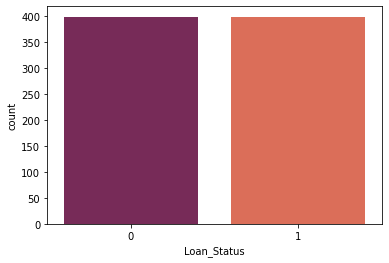

In [97]:
sns.countplot(y,palette='rocket')

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:blue'> Now Lets Scale The Dataset <h2>

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.50157,-1.219631,-0.685291,-0.521119,-0.336581,0.692718,-1.097464,-0.022562,0.217908,0.578759,1.277419
1,0.50157,0.819920,0.347837,-0.521119,-0.336581,0.226702,0.771046,-0.022562,0.217908,0.578759,-1.248856
2,0.50157,0.819920,-0.685291,-0.521119,2.971054,-0.567702,-1.097464,-1.507475,0.217908,0.578759,1.277419
3,0.50157,0.819920,-0.685291,1.918946,-0.336581,-0.843738,0.922874,-0.181901,0.217908,0.578759,1.277419
4,0.50157,-1.219631,-0.685291,-0.521119,-0.336581,0.741788,-1.097464,0.222657,0.217908,0.578759,1.277419
...,...,...,...,...,...,...,...,...,...,...,...
791,0.50157,0.819920,-0.685291,-0.521119,-0.336581,0.184441,0.791305,0.314703,0.217908,-1.867737,1.277419
792,0.50157,0.819920,0.347837,1.918946,-0.336581,-0.885832,0.861310,0.147699,-3.121118,0.491742,1.277419
793,0.50157,0.819920,-0.685291,1.918946,-0.336581,0.987711,-1.097464,-0.353522,0.217908,-1.266203,1.277419
794,-1.99374,-1.219631,-0.685291,-0.521119,-0.336581,-0.425267,-1.097464,-0.930506,0.217908,0.578759,-1.248856


## WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)


In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [102]:
vif_cal()

    VIF FACTOR           FEATURES
0     1.215006             Gender
1     1.436434            Married
2     1.205044         Dependents
3     1.077074          Education
4     1.049349      Self_Employed
5     1.850395    ApplicantIncome
6     1.639678  CoapplicantIncome
7     1.631308         LoanAmount
8     1.074067   Loan_Amount_Term
9     1.011101     Credit_History
10    1.024455      Property_Area


#### There is no multicollinearity in dataset

# Model Training And Training

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split

In [105]:
lr=LogisticRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {accuracy_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {accuracy_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.7562893081761006
At random state 0,the testing accuracy is :- 0.775



At random state 1,the training accuracy is :- 0.7641509433962265
At random state 1,the testing accuracy is :- 0.75625



At random state 2,the training accuracy is :- 0.7767295597484277
At random state 2,the testing accuracy is :- 0.73125



At random state 3,the training accuracy is :- 0.7657232704402516
At random state 3,the testing accuracy is :- 0.7875



At random state 4,the training accuracy is :- 0.7672955974842768
At random state 4,the testing accuracy is :- 0.74375



At random state 5,the training accuracy is :- 0.7720125786163522
At random state 5,the testing accuracy is :- 0.7625



At random state 6,the training accuracy is :- 0.7578616352201258
At random state 6,the testing accuracy is :- 0.7625



At random state 7,the training accuracy is :- 0.7688679245283019
At random state 7,the testing accuracy is :- 0.74375



At random state 8,the training accura

At random state 72,the testing accuracy is :- 0.75625



At random state 73,the training accuracy is :- 0.7845911949685535
At random state 73,the testing accuracy is :- 0.69375



At random state 74,the training accuracy is :- 0.7594339622641509
At random state 74,the testing accuracy is :- 0.81875



At random state 75,the training accuracy is :- 0.7751572327044025
At random state 75,the testing accuracy is :- 0.74375



At random state 76,the training accuracy is :- 0.789308176100629
At random state 76,the testing accuracy is :- 0.65



At random state 77,the training accuracy is :- 0.7657232704402516
At random state 77,the testing accuracy is :- 0.79375



At random state 78,the training accuracy is :- 0.7468553459119497
At random state 78,the testing accuracy is :- 0.825



At random state 79,the training accuracy is :- 0.7610062893081762
At random state 79,the testing accuracy is :- 0.80625



At random state 80,the training accuracy is :- 0.7783018867924528
At random state 80,the

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12)

In [107]:
lr.fit(x_train,y_train)

LogisticRegression()

In [108]:
pred_train=lr.predict(x_train)

In [109]:
pred_test=lr.predict(x_test)

In [110]:
accuracy_score(y_test,pred_test)

0.76875

In [111]:
from sklearn.metrics import classification_report

In [112]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.88      0.54      0.67        70
           1       0.73      0.94      0.82        90

    accuracy                           0.77       160
   macro avg       0.81      0.74      0.75       160
weighted avg       0.80      0.77      0.76       160



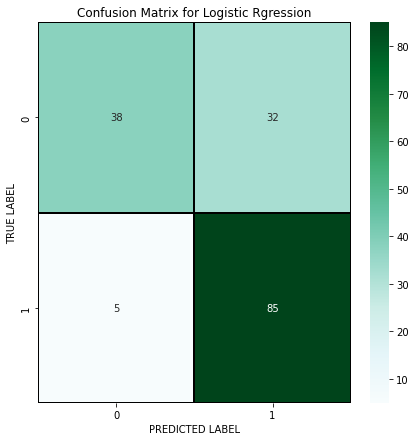

In [114]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,pred_test)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Rgression')
plt.show()


#### This is the confusion matrix for Logistic Regression  where we can observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

## Cv for Logistic Regression

In [116]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)

In [117]:
for i in range(3,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 3
Cross validation score is :- 73.12101007235069
Accuracy_score is :- 76.875


At cv:- 4
Cross validation score is :- 75.62814070351759
Accuracy_score is :- 76.875


At cv:- 5
Cross validation score is :- 75.50786163522012
Accuracy_score is :- 76.875


At cv:- 6
Cross validation score is :- 75.51074656337813
Accuracy_score is :- 76.875


At cv:- 7
Cross validation score is :- 76.00860558475836
Accuracy_score is :- 76.875


At cv:- 8
Cross validation score is :- 75.39772727272727
Accuracy_score is :- 76.875


At cv:- 9
Cross validation score is :- 76.28390648053569
Accuracy_score is :- 76.875




In [118]:
# I will take CV as 9 bcz its close to accuracy score
lsscore_selected= cross_val_score(lr,x,y,cv=9).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.7628390648053569 
The accuracy_score is: 0.76875


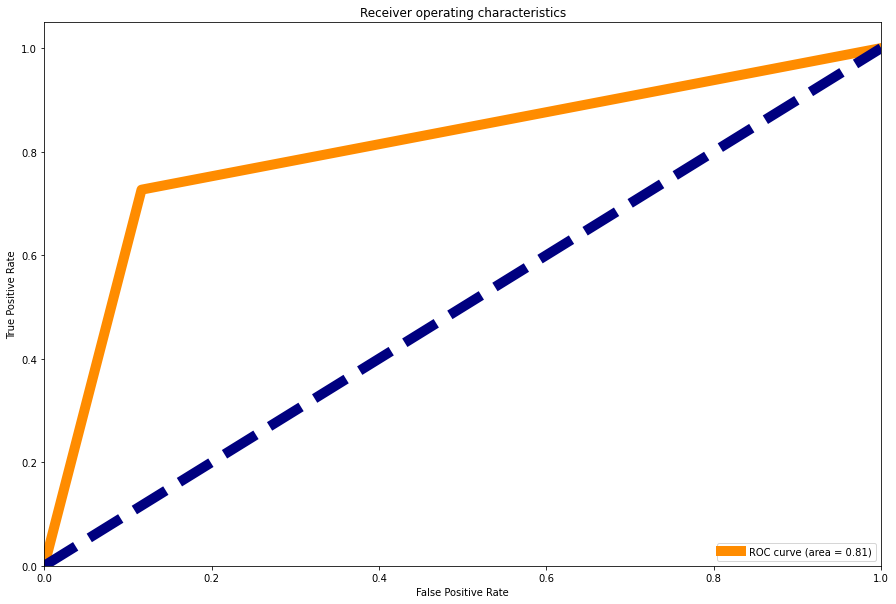

In [119]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(15,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression is covering 81% under ROC Curve

# Decision Tree Classifier

In [120]:
# Checking Accuracy for Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

#Prediction
preddt = dt.predict(x_test)

print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))
print('CV  :-',cross_val_score(dt,x,y,cv=5).mean())


0.80625
[[54 16]
 [15 75]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.78        70
           1       0.82      0.83      0.83        90

    accuracy                           0.81       160
   macro avg       0.80      0.80      0.80       160
weighted avg       0.81      0.81      0.81       160

CV  :- 0.7600707547169812


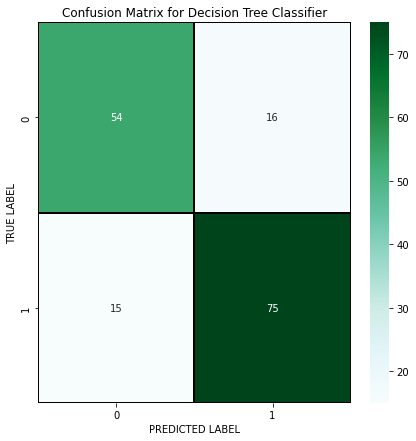

In [121]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,preddt)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


#### This is the confusion matrix for Decision Tree classifier where we can observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

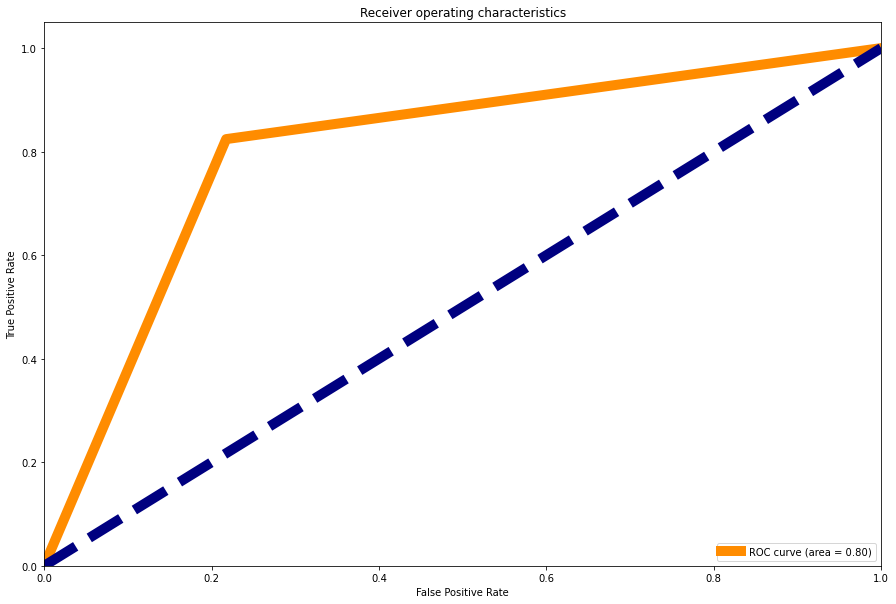

In [122]:
fpr,tpr,threshold=roc_curve(preddt,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(15,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### DTC is covering 80% under the ROC Curve

# KNeighbors Classifier

In [123]:
# Checking accuracy for KNeighbors Classifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))
print('CV  :-',cross_val_score(knn,x,y,cv=5).mean())


0.75625
[[48 22]
 [17 73]]
              precision    recall  f1-score   support

           0       0.74      0.69      0.71        70
           1       0.77      0.81      0.79        90

    accuracy                           0.76       160
   macro avg       0.75      0.75      0.75       160
weighted avg       0.76      0.76      0.76       160

CV  :- 0.7600864779874215


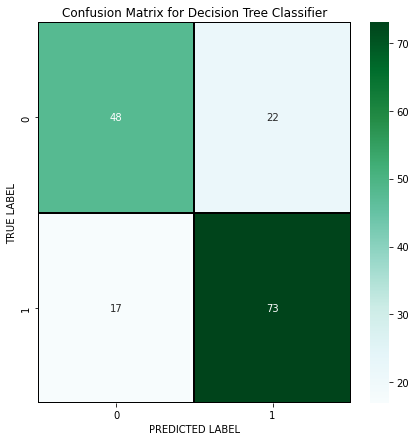

In [124]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


#### This is the confusion matrix for  KNeighbors classifier where we can observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

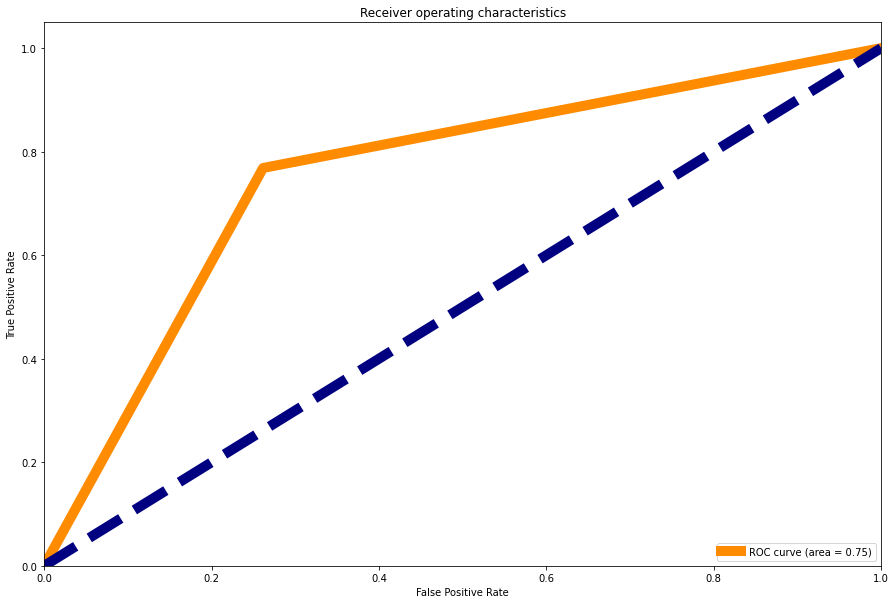

In [125]:
fpr,tpr,threshold=roc_curve(predknn,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(15,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### KN Classifier is covering 75% under the ROC curve 

# Ensemble Technique

In [126]:
# Checking accuracy for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))
print('CV  :-',cross_val_score(rf,x,y,cv=5).mean())


0.8625
[[56 14]
 [ 8 82]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        70
           1       0.85      0.91      0.88        90

    accuracy                           0.86       160
   macro avg       0.86      0.86      0.86       160
weighted avg       0.86      0.86      0.86       160

CV  :- 0.8430345911949686


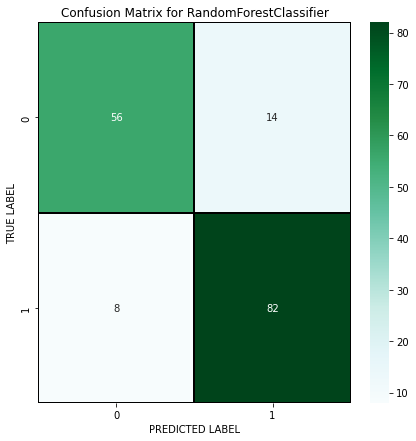

In [127]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()


#### This is the confusion matrix forRandom Forest classifier where we can observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

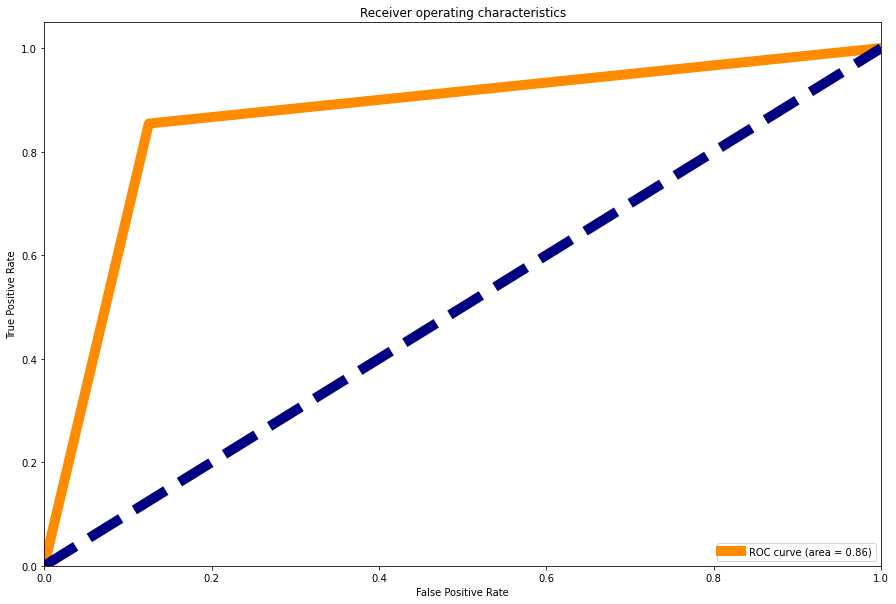

In [128]:
fpr,tpr,threshold=roc_curve(predrf,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(15,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### RFC is covering 86% under the ROC Curve

In [129]:
# Checking accuracy for Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

# Prediction
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

print('CV  :-',cross_val_score(gb,x,y,cv=5).mean())


0.80625
[[49 21]
 [10 80]]
              precision    recall  f1-score   support

           0       0.83      0.70      0.76        70
           1       0.79      0.89      0.84        90

    accuracy                           0.81       160
   macro avg       0.81      0.79      0.80       160
weighted avg       0.81      0.81      0.80       160

CV  :- 0.7852358490566038


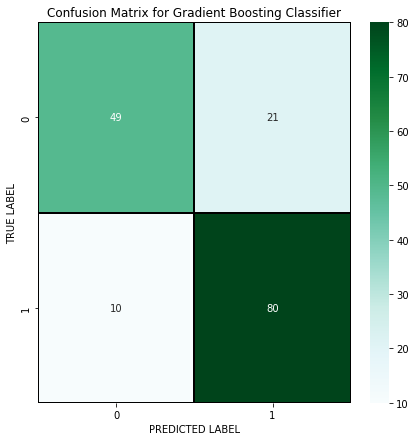

In [130]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()


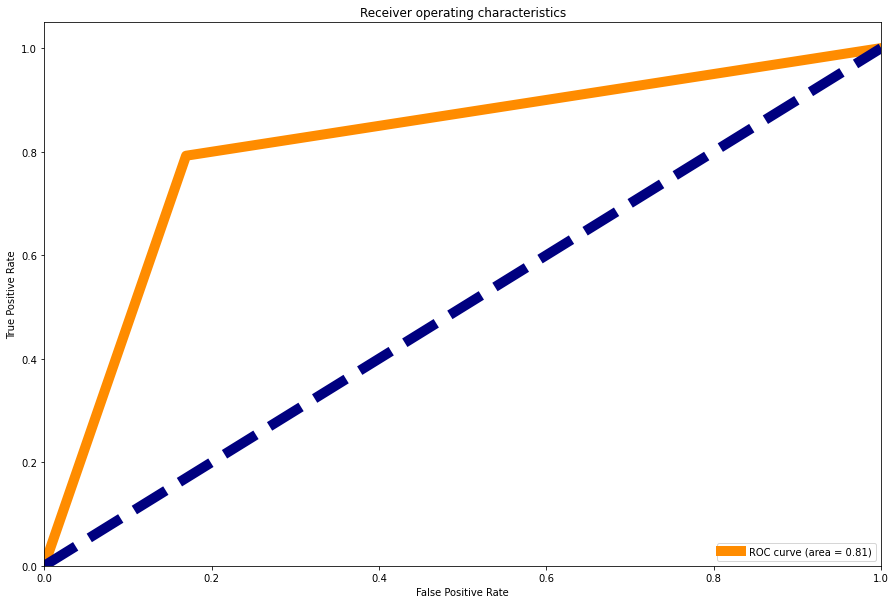

In [131]:
fpr,tpr,threshold=roc_curve(predgb,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(15,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### Gradient boosting classifier is covering 81% under ROC Curve

In [133]:
mm=pd.DataFrame([["Logistic Regression","81%"],["Decision Tree Classifier","80%"],["KNeighbors Classifier","75%"],["Random Forest Classifier","86%"],["Gradient Boosting","81%"]],
                    columns=["Model_Name","AccuracyScore"])

mm

,Model_Name,AccuracyScore
0,Logistic Regression,81%
1,Decision Tree Classifier,80%
2,KNeighbors Classifier,75%
3,Random Forest Classifier,86%
4,Gradient Boosting,81%


#### from difference between accuracy score and cv sore Logistic Regression is best as it have least difference.. as sccuracy is 0.768 and cv score is 0.762

# Hyperparameter Tuning

In [134]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [135]:
#LOgistic Regression
parameters = {'fit_intercept' : [True, False],'multi_class':['auto', 'ovr', 'multinomial'],
             'max_iter':[2,100],
             'warm_start':[True,False]}

In [137]:
from sklearn.model_selection import GridSearchCV

qq=GridSearchCV(LogisticRegression(),parameters,cv=5)

In [138]:
qq.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False], 'max_iter': [2, 100],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'warm_start': [True, False]})

In [139]:
qq.best_params_

{'fit_intercept': True,
 'max_iter': 2,
 'multi_class': 'auto',
 'warm_start': True}

In [144]:
lrr = LogisticRegression(fit_intercept = True,max_iter=2, multi_class='auto', warm_start=True)
lrr.fit(x_train, y_train)
pred = lrr.predict(x_test)
print('Accuracy_Score :-> ',accuracy_score(y_test,pred)*100)

Accuracy_Score :->  77.5


### My model is worling at 75% accuracy in hyperparameter tuning

# Plotting AUC ROC for Final Model

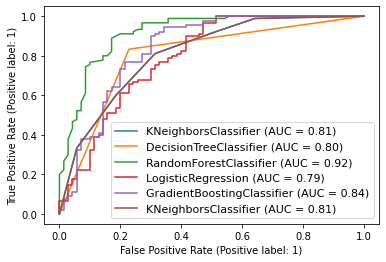

In [141]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(dt, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gb, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()


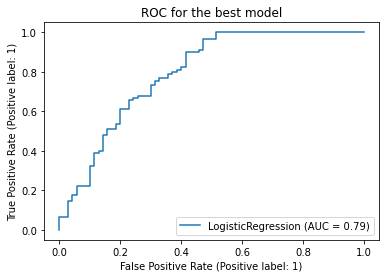

In [145]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(lrr, x_test, y_test)
plt.title("ROC for the best model")
plt.show()


# Save the Model

In [146]:
#Saving the model using .pkl
import joblib
joblib.dump(rf,"Loan_app.pkl")

['Loan_app.pkl']

In [147]:
#Loading the saved model
aa=joblib.load("Loan_app.pkl")

In [148]:
#Prediction
prediction = aa.predict(x_test)
prediction

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0])

In [149]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0,1
1,1,1
2,1,0
3,0,0
4,1,1
...,...,...
155,0,0
156,1,1
157,1,1
158,0,0


#### Actual value and predicted value are almost same

# Project Completes Here

# -------------------------------------------------------------